In [25]:
import pandas as pd
data = pd.read_csv('Iris.csv')


# change label to number
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [26]:
import numpy as np
data = np.array(data)
#  shuffle the data
np.random.shuffle(data)

# one hot encoding
#  split the data into training and test data
train_data = data[:int(0.8*len(data))].T
X_train = train_data[1:5]
Y_train = train_data[5].astype(int)

test_data = data[int(0.8*len(data)):].T
X_test = test_data[1:5]
Y_test = test_data[5].astype(int)

X_Full = data.T[1:5]
Y_Full = data.T[5].astype(int)

print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))
print("X_Full shape: " + str(X_Full.shape))
print("Y_Full shape: " + str(Y_Full.shape))



X_train shape: (4, 120)
Y_train shape: (120,)
X_test shape: (4, 30)
Y_test shape: (30,)
X_Full shape: (4, 150)
Y_Full shape: (150,)


In [27]:
import nn as nn
import matplotlib.pyplot as plt

#  create a neural network
# np.random.seed(100)
myNetwork = nn.NeuralNetwork(4, 3, 3)
print("Initial Weights: ")
print(myNetwork.W1)
print(myNetwork.W2)
print("Initial Biases: ")
print(myNetwork.b1)
print(myNetwork.b2)

Initial Weights: 
[[ 0.26550488 -0.07390538  0.34620409  0.8140937 ]
 [-0.12516024 -0.12515147  0.84412476  0.41021112]
 [-0.25094461  0.29001054 -0.24770718 -0.24894302]]
[[ 0.13969698 -1.10463286 -0.99588177]
 [-0.32463686 -0.58475832  0.18143078]
 [-0.52424794 -0.81539392  0.84619271]]
Initial Biases: 
[[-0.2257763 ]
 [ 0.0675282 ]
 [-1.42474819]]
[[-0.54438272]
 [ 0.11092259]
 [-1.15099358]]


In [28]:

#  train the network
costs, acc, best_epoch = myNetwork.train(X_train, Y_train, 200, 0.01)

Epoch 1/200 - train cost: 0.5668, train acc: 0.3583
Epoch 2/200 - train cost: 0.5417, train acc: 0.3583
Epoch 3/200 - train cost: 0.5182, train acc: 0.3583
Epoch 4/200 - train cost: 0.4964, train acc: 0.3500
Epoch 5/200 - train cost: 0.4759, train acc: 0.3500
Epoch 6/200 - train cost: 0.4569, train acc: 0.3500
Epoch 7/200 - train cost: 0.4391, train acc: 0.3500
Epoch 8/200 - train cost: 0.4225, train acc: 0.3500
Epoch 9/200 - train cost: 0.4072, train acc: 0.3500
Epoch 10/200 - train cost: 0.3929, train acc: 0.3500
Epoch 11/200 - train cost: 0.3797, train acc: 0.3500
Epoch 12/200 - train cost: 0.3676, train acc: 0.3500
Epoch 13/200 - train cost: 0.3564, train acc: 0.3500
Epoch 14/200 - train cost: 0.3463, train acc: 0.3500
Epoch 15/200 - train cost: 0.3371, train acc: 0.3583
Epoch 16/200 - train cost: 0.3288, train acc: 0.3583
Epoch 17/200 - train cost: 0.3213, train acc: 0.3583
Epoch 18/200 - train cost: 0.3146, train acc: 0.3583
Epoch 19/200 - train cost: 0.3086, train acc: 0.3583
Ep

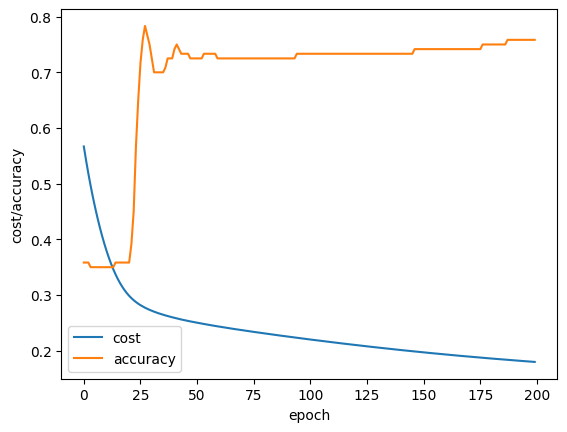

In [29]:
# plot the cost and accuracy in one graph
plt.plot(costs, label='cost')
plt.plot(acc, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('cost/accuracy')
plt.legend()
plt.show()

In [30]:
Z1, A1, Z2, A2 = myNetwork.forward(X_Full)
print("A2: ", A2.shape)
print("Y_Full: ", Y_Full.shape)

A2:  (3, 150)
Y_Full:  (150,)


In [31]:
#  calculate the cost
cost = -np.mean(Y_Full * np.log(A2 + 1e-8))
print("cost: ", cost)

cost:  1.6324931338307154


In [32]:
Y_one =myNetwork.one_hot_encode(Y_Full)
print("Y_one: ", Y_one.shape)

cost2 = -np.mean(Y_one * np.log(A2 + 1e-8))
print("cost2: ", cost2)


Y_one:  (3, 150)
cost2:  0.18005431026820953
